In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Locale settings
import locale
# Set to German locale to get comma decimal seperator
# Check with "locale -a" if "de_DE.utf8" is installed on your system
# Installation guide: https://ubuntuforums.org/showthread.php?t=196414
locale.setlocale(locale.LC_NUMERIC, "de_DE.utf8")

from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib.colors import rgb2hex
from pathlib import Path

# Tell matplotlib to use the locale
plt.rcParams['axes.formatter.use_locale'] = True

In [2]:
# Plot parameters
# Style
style = "whitegrid"
# Figure sizes
standard_sizes = {
    "a4portrait": (8.27, 11.69),
    "a4landscape": (11.69, 8.27),
    "a5portrait": (5.8, 8.3),
    "a5landscape": (8.3, 5.8),
}
# Font parameters
font = "Latin Modern Roman"
font_scale = 1.5
# Figure aesthetics
grid_linestyle = "--"
yticks = True
xticks = True

In [3]:
# Colors
def RGB_to_hex(red, green, blue):
    """Return color as #rrggbb for the given color values."""
    return '#%02x%02x%02x' % (red, green, blue)

def rgb_to_RGB(rgb_tuple):
    return tuple(
        [int(round(255*val, 0)) for val in rgb_tuple])

palette = sns.color_palette("colorblind")


rgb_grid = (200, 200, 200)
rgb_labels = (0, 0, 0)


hex_grid = RGB_to_hex(*rgb_grid)
hex_labels = RGB_to_hex(*rgb_labels)

print("="*10, "COLOR PALETTE", "="*10)

for color in palette:
    print(f"HEX: {rgb2hex(color)} --> RGB: {rgb_to_RGB(color)}")
    
print("\n", "="*10, "GRID", "="*10)
print(f"HEX: {hex_grid} --> RGB: {rgb_grid}")

print("\n", "="*10, "LABELS", "="*10)
print(f"HEX: {hex_labels} --> RGB: {rgb_labels}")

========== COLOR PALETTE ==========
HEX: #0173b2 --> RGB: (1, 115, 178)
HEX: #de8f05 --> RGB: (222, 143, 5)
HEX: #029e73 --> RGB: (2, 158, 115)
HEX: #d55e00 --> RGB: (213, 94, 0)
HEX: #cc78bc --> RGB: (204, 120, 188)
HEX: #ca9161 --> RGB: (202, 145, 97)
HEX: #fbafe4 --> RGB: (251, 175, 228)
HEX: #949494 --> RGB: (148, 148, 148)
HEX: #ece133 --> RGB: (236, 225, 51)
HEX: #56b4e9 --> RGB: (86, 180, 233)

 ========== GRID ==========
HEX: #c8c8c8 --> RGB: (200, 200, 200)

 ========== LABELS ==========
HEX: #000000 --> RGB: (0, 0, 0)


In [4]:
# Set seaborn parameters
rc_theme = {
    "grid.linestyle":grid_linestyle,
    "ytick.left":yticks,
    "xtick.bottom":xticks,
    "ytick.color":hex_grid,
    "ytick.labelcolor":hex_labels,
    "xtick.color":hex_grid,
    "xtick.labelcolor":hex_labels,
    "grid.color":hex_grid,
    "patch.edgecolor":"black",
}

sns.set_theme(
    style=style, font=font, font_scale=font_scale, palette=palette, rc=rc_theme)

In [5]:
data_dir = Path(
    "/home/kilian/mounts/rli/Daten_flexibel_02/open_bea_calculations_kh/open_bea_calculations_v4"
    "/concated_curtailment_results/curtailment_per_gen_and_load"
)

grid_ids = [176, 177, 1056, 1690, 1811, 2534]
strategies = ["dumb", "reduced", "residual"]
storage_system = [
    "edisgo_files",
    "edisgo_files_with_solar_storage_full_year",
]

grid_pairs = [
    [176, 1056],
    [1690, 1811],
    [177, 2534],
]

naming_dict = {
    (False, 'reduced'): "RED",
    (False, 'residual'): "RES",
    (True, 'dumb'): "REF-BESS",
    (True, 'reduced'):"RED-BESS",
    (True, 'residual'): "RES-BESS",
}

legend_dict = {
    "cur_fee": "fEE",
    "cur_consumers": "Lasten",
}

export_dict = {
    1056: "pv_dom",
    1811: "wind_dom",
    2534: "load_dom",
}

export_dir = data_dir.parent.parent / "plots"

export_dir.mkdir(parents=True, exist_ok=True)

export_name = "{}_curtailment_per_gen_and_load.{}"
figure_export_as = ["png", "jpg", "pdf"]

kind_dict = {
    176: "PV",
    177: "L",
    1056: "PV",
    1690: "W",
    1811: "W",
    2534: "L"}

title_dict = {key: f"$\mathregular{{{key}_{{{val}}}}}$"
               for key, val in kind_dict.items()}
title_dict

{176: '$\\mathregular{176_{PV}}$',
 177: '$\\mathregular{177_{L}}$',
 1056: '$\\mathregular{1056_{PV}}$',
 1690: '$\\mathregular{1690_{W}}$',
 1811: '$\\mathregular{1811_{W}}$',
 2534: '$\\mathregular{2534_{L}}$'}

In [6]:
results_df = pd.concat(
    [pd.read_csv(f) for f in data_dir.iterdir()]
)
    
results_df = results_df.sort_values(
    by=["grid_id", "ess", "strategy"]
).set_index(
    ["grid_id", "ess", "strategy"]
)

results_df.head()

cur_pv  cur_wind       cur_fix      cur_evs  \
grid_id ess   strategy                                                     
176     False dumb      2284.232271       0.0  12097.629177  4307.554113   
              reduced   2316.965648       0.0  12091.329702  4208.245848   
              residual  2161.584608       0.0  12090.989968  4281.605589   
        True  dumb      2165.148428       0.0  12096.614317  4309.686533   
              reduced   2189.613373       0.0  12090.656630  4212.090649   

                         cur_loads  
grid_id ess   strategy              
176     False dumb      605.047720  
              reduced   558.126961  
              residual  587.168899  
        True  dumb      599.851800  
              reduced   554.904901

In [7]:
idx = pd.IndexSlice

results_df = results_df.assign(
    cur_fee=results_df.cur_pv + results_df.cur_wind,
    cur_consumers=results_df.cur_evs + results_df.cur_loads,
)

df_lst = []

for grid_id in grid_ids:
    slice_df = results_df.loc[idx[grid_id, :, :], :]
    
    df_lst.append(slice_df.iloc[1:] / slice_df.iloc[0] - 1)
    
percental_df = pd.concat(
    df_lst,
)

percental_df.head()

cur_pv  cur_wind   cur_fix   cur_evs  cur_loads  \
grid_id ess   strategy                                                      
176     False reduced   0.014330       NaN -0.000521 -0.023054  -0.077549   
              residual -0.053693       NaN -0.000549 -0.006024  -0.029549   
        True  dumb     -0.052133       NaN -0.000084  0.000495  -0.008588   
              reduced  -0.041423       NaN -0.000576 -0.022162  -0.082874   
              residual -0.104586       NaN -0.012986 -0.013118  -0.040561   

                         cur_fee  cur_consumers  
grid_id ess   strategy                           
176     False reduced   0.014330      -0.029766  
              residual -0.053693      -0.008921  
        True  dumb     -0.052133      -0.000624  
              reduced  -0.041423      -0.029639  
              residual -0.104586      -0.016498

In [8]:
def align_axs(axs, rel_ws=0.03):
    ylims = [ax.get_ylim() for ax in axs]
    
    min_val = min(0, min(ylims, key = lambda t: t[0])[0])
    max_val = max(0, max(ylims, key = lambda t: t[1])[1])
    
    whitespace = max(max_val * rel_ws, abs(min_val * rel_ws))
    
    for ax in axs:
        ax.set_ylim(min_val-whitespace, max_val+(whitespace*3))
        

def show_values_on_bars(axs, extra_space=0):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = (p.get_y() + p.get_height()) + extra_space
            value = '{:.1f}'.format(p.get_height()).replace(".", ",")
            txt = ax.text(_x, _y, value, ha="center")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        

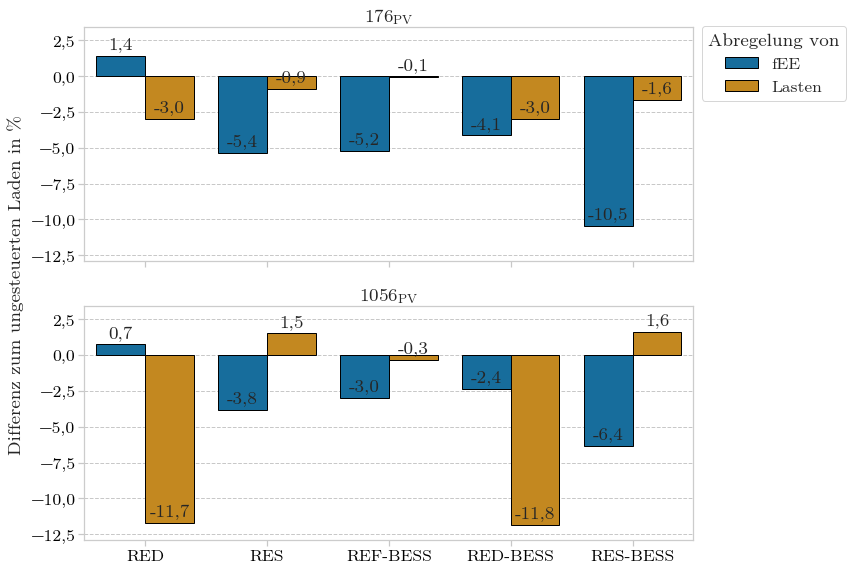

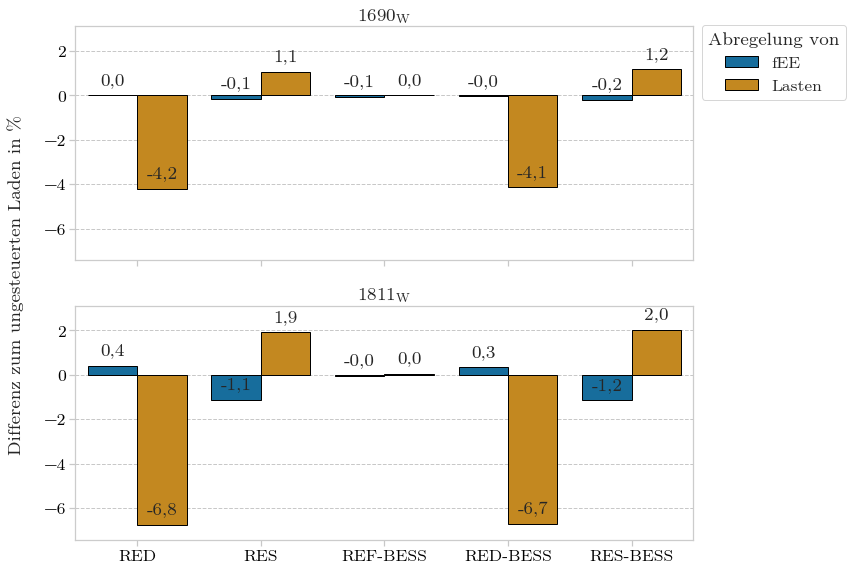

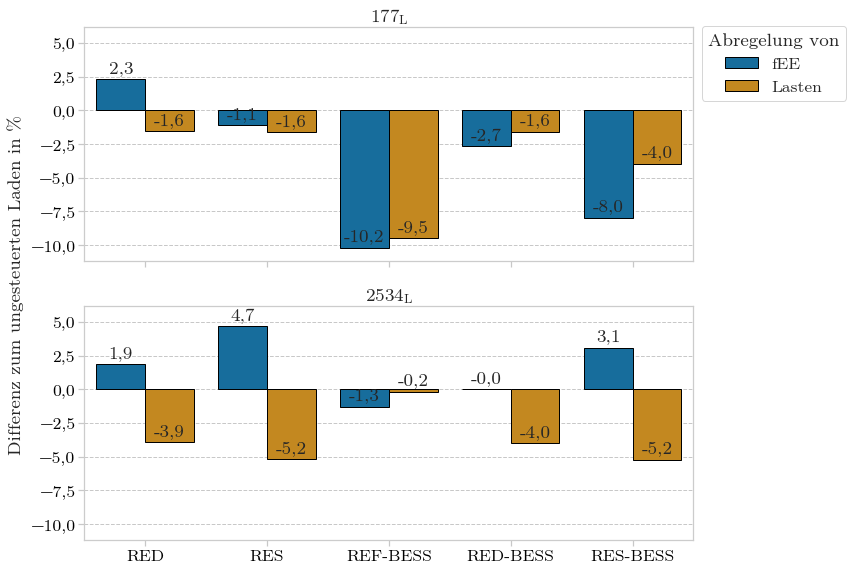

In [13]:
# plot_df = percental_df.multiply(100).assign(
#     bar_name=[i[1:] for i in percental_df.index]
# )

# plot_df.bar_name = plot_df.bar_name.map(naming_dict)

plot_df = percental_df[
    [
        "cur_fee",
        "cur_consumers",
    ]
].multiply(100).melt(ignore_index=False)

plot_df = plot_df.assign(
    bar_name=[i[1:] for i in plot_df.index]
)

plot_df.bar_name = plot_df.bar_name.map(naming_dict)

for grid_pair in grid_pairs:
    fig, axs = plt.subplots(
        2, 1, figsize=standard_sizes["a4landscape"]
    )
    
    max_val = 0
    
    for count, grid_id in enumerate(grid_pair):
        grid_df = plot_df.loc[idx[grid_id, :, :], :]
                
        max_val = max(plot_df.value.abs().max(), max_val)

        sns.barplot(
            x="bar_name",
            y="value",
            hue="variable",
            data=grid_df,
            ax=axs[count],
            palette=sns.color_palette("colorblind"),
            ci=None,
        ).set(
            title=title_dict[grid_id],
            xlabel=None,
            ylabel=None,
        )
                
        if count == 0:
            axs[count].set(xticklabels=[])
            
            handles, labels = axs[count].get_legend_handles_labels()
            labels = [legend_dict[label] for label in labels]
            
            axs[count].legend(
                handles=handles, labels=labels,
                bbox_to_anchor=(1,1.04),
                loc="upper left",
                title="Abregelung von",
            )
        else:
            axs[count].get_legend().remove()
        
    align_axs(axs)
    
    show_values_on_bars(axs, extra_space=max_val/25)
    
    fig.text(
        -0.02,
        0.5,
        "Differenz zum ungesteuerten Laden in %",
        va="center", 
        rotation="vertical",
    )
    
    plt.tight_layout()
    
    for kind in figure_export_as:
        plt.savefig(
            export_dir / export_name.format(
                export_dict[grid_id],
                kind,
            ),
            dpi=450, bbox_inches="tight")
    
    plt.show()
